In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
from pprint import pprint
from copy import deepcopy
import random

import numpy as np

K = 4

def clusters_are_equal(clusters, previous_clusters):
    if len(clusters) != len(previous_clusters):
        return False

    for index_1, index_2 in zip(clusters, previous_clusters):
        cluster_1 = clusters[index_1]
        cluster_2 = previous_clusters[index_2]

        # Different clusters
        if cluster_1["points"] != cluster_2["points"]:
            return False
    
    # All clusters are equal
    return True


def get_cluster_center(cluster):
    center = list()

    for feature in range(len(cluster["center"])):
        average = np.average(np.array(cluster["data"])[:, feature])
        
        center.append(average)
    
    return center


def k_means_clustering(k, input_data):
    data = deepcopy(list(input_data))
    clusters = dict()
    previous_clusters = dict()

    for index in range(k):
        # Randomly picks a center
        initial_center = random.choice(data)
        clusters[index] = {
            "center": initial_center,
            # Points is a set for comparing differente clusters
            "points": None
        }

    while not clusters_are_equal(clusters, previous_clusters):
        previous_clusters = deepcopy(clusters)

        # Reset clusters
        for cluster in clusters:
            clusters[cluster]["data"] = list()
            clusters[cluster]["points"] = set()

        for (index, point) in enumerate(data):
            point_cluster = int()
            point_distance = float("inf")

            for cluster_index in clusters:
                center = clusters[cluster_index]["center"]
                distance = 0

                for feature in range(len(point)):
                    distance += (point[feature] - center[feature]) ** 2 
                
                distance = np.sqrt(distance)

                # Find closest cluster center to point
                if distance <= point_distance:
                    point_distance = distance
                    point_cluster = cluster_index
                
            clusters[point_cluster]["data"].append(point)
            clusters[point_cluster]["points"].add(index)
        
        for index in clusters:
            cluster = clusters[index]
            clusters[index]["center"] = get_cluster_center(cluster)
    
    # pprint([clusters[cluster]["data"] for cluster in clusters])
    return clusters

clusters = k_means_clustering(K, iris["data"])

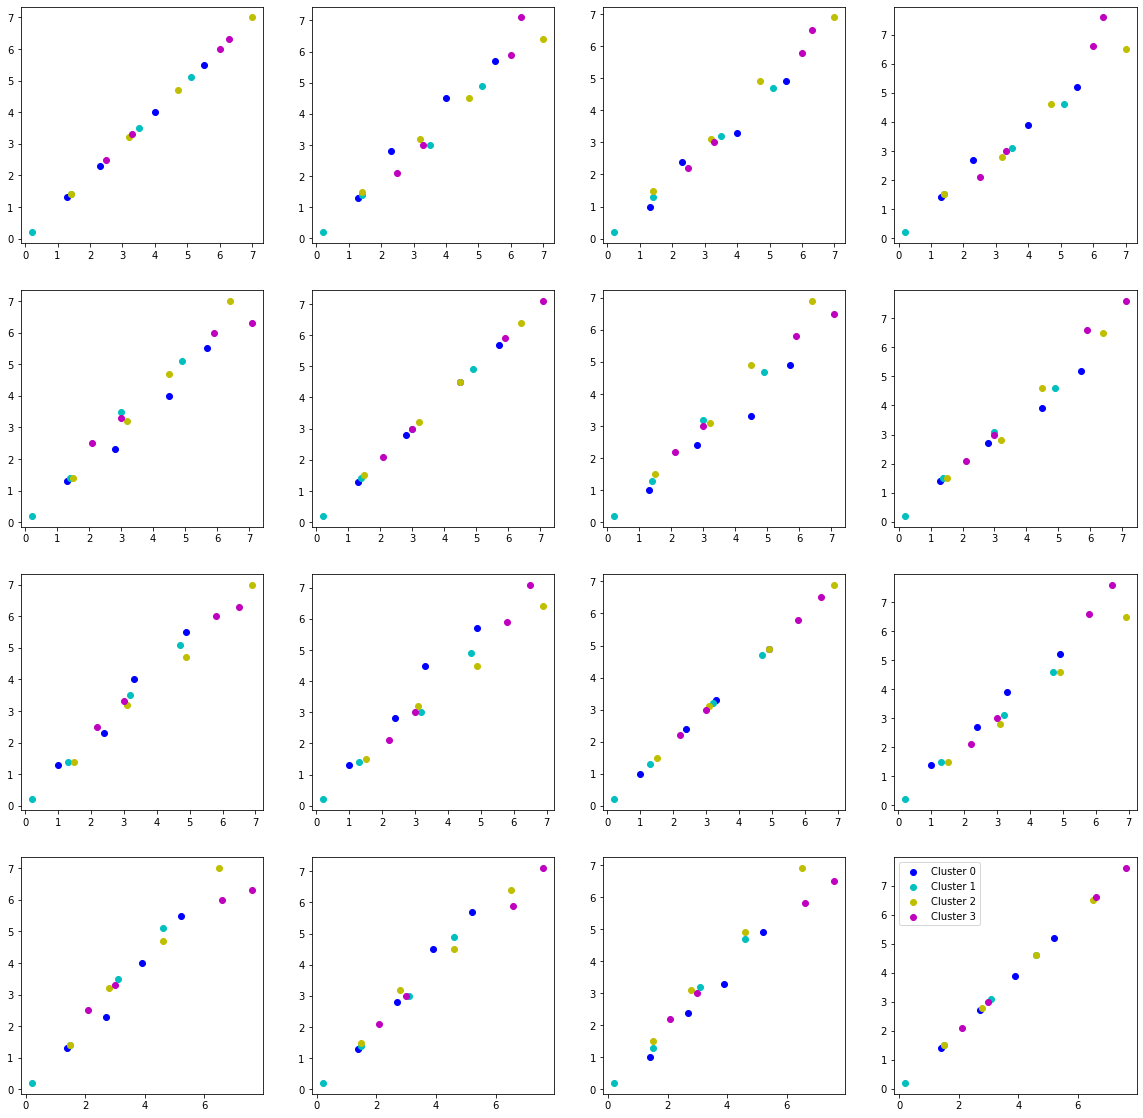

In [ ]:
from itertools import product

import matplotlib.pyplot as plt

features = len(clusters[0]["center"])

colors = ['b', 'c', 'y', 'm', 'r']

fig, axs = plt.subplots(features, features)
fig.set_size_inches(features * 5, features * 5)

for f1, f2 in product(range(features), range(features)):
    for cluster in clusters:
        x = clusters[cluster]['data'][f1]
        y = clusters[cluster]['data'][f2]

        ax = axs[f1, f2]
        ax.scatter(x, y, c=colors[cluster], label=f'Cluster {cluster}')


plt.legend()
plt.show()